In [1]:
# Perform required imports
import os
import PyQt5
import mne
import matplotlib.pyplot as plt
import numpy as np
from mne.preprocessing import ICA
import sklearn
from mne.time_frequency import psd_array_welch
%matplotlib qt


In [13]:
# Load Data From Participant
participant_id = 'P03'


data = mne.read_epochs(f'{participant_id}_tapping-readiness-pot-epo.fif', preload=True)


Reading c:\Users\ymijs\OneDrive\Documents\Internship\Apathy-Agency\EEG Experiment\Data Analysis\P03_tapping-readiness-pot-epo.fif ...
    Found the data of interest:
        t =   -5000.00 ...    9000.00 ms
        0 CTF compensation matrices available
Not setting metadata
213 matching events found
No baseline correction applied
0 projection items activated


<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, ...
 chs: 61 EEG, 1 Dipole, 1 ECG, 2 EOG
 custom_ref_applied: True
 dig: 64 items (3 Cardinal, 61 EEG)
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 lowpass: 50.0 Hz
 meas_date: 2025-02-12 14:49:52 UTC
 meas_id: 4 items (dict)
 nchan: 65
 projs: []
 sfreq: 1000.0 Hz
>
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\ymijs\AppData\Local\Temp\ipykernel_32444\2050808542.py:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_avg.plot( spatial_colors=True)


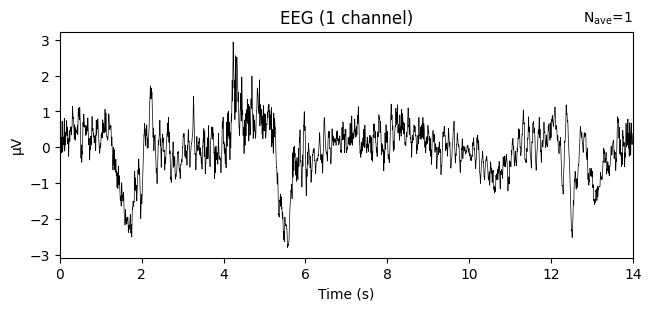

In [16]:

print(data.info)

# Pick the channels of interest (adjust to your channel names)
channels_of_interest = ['FC3', 'FCz', 'FC4', ]

# Select the channels and get the data
rest_pot_epochs = data.copy().pick(channels_of_interest).get_data()

# Average across the selected channels (axis=1) and then across epochs (axis=0)
tapping_epochs_avg = rest_pot_epochs.mean(axis=1).mean(axis=0)

# Reshape to match the expected input for EvokedArray (1 channel, n_times)
tapping_epochs_avg = tapping_epochs_avg[np.newaxis, :]

# Create a new info object for the averaged channel (only 1 channel here)
info = mne.create_info(ch_names=['Avg_C3_Cz_C4'], sfreq=data.info['sfreq'], ch_types='eeg')

# Create the Evoked object to visualize the averaged data
evoked_avg = mne.EvokedArray(tapping_epochs_avg, info)

# Plot the averaged readiness potential
evoked_avg.plot( spatial_colors=True)


Setting up low-pass filter at 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 1321 samples (1.321 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    3.9s
[Parallel(n_job

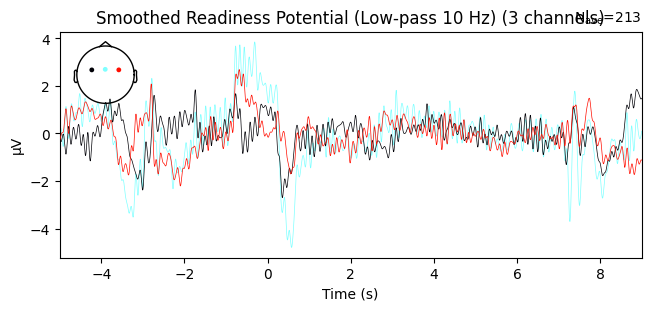

In [15]:
data.load_data()

# Apply a low-pass filter at 10 Hz (or lower for smoother curves)
tapping_epochs_smooth = data.copy().filter(l_freq=None, h_freq=10)

# Average the smoothed data
evoked_smooth = tapping_epochs_smooth.average(picks=['Cz', 'C3', 'C4'])

# Plot the smoothed average
evoked_smooth.plot(spatial_colors=True, titles="Smoothed Readiness Potential (Low-pass 10 Hz)")
